## Project Objective :
### Convert raw data into model ready data

# About Dataset

The dataset we will be using here is the __Wine Quality data__ containing certain information about red and white wine.

Quality of the wine is based on sensory scores (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent).

This popular dataset is commonly used for predicting whether a particular wine is __“good quality”__ or not.

# Input variables:

fixed acidity  
volatile acidity  
citric acid  
residual sugar  
chlorides  
free sulfur dioxide  
total sulfur dioxide  
density  
pH  
sulphates  
alcohol  

# Output variable:

quality (score between 0 and 10)

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from scipy.stats import norm, boxcox
from scipy import stats
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
red_wine_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Wine_Dataset/winequality-red.csv',sep=';')

# Initial Review

In [3]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine_data.shape

(1599, 12)

In [5]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Free sulfur dioxide and total sulfur dioxide have high dispersion in compared to other variables

# Exploring Features

In [6]:
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
red_wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
red_wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

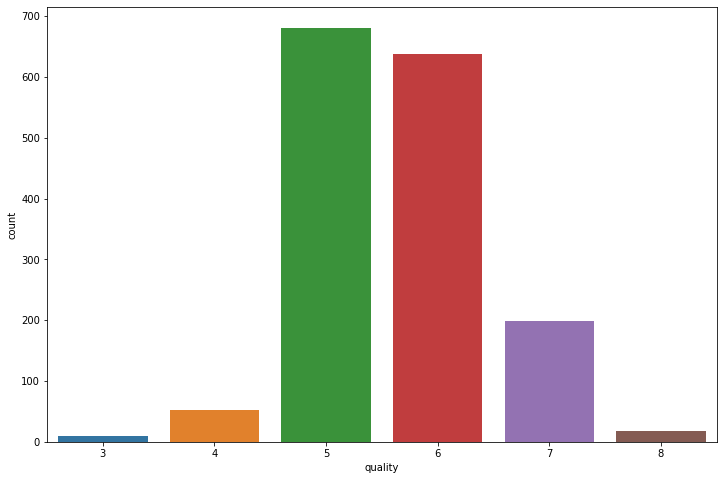

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(red_wine_data.quality)

__The average(5-7) quality of wines are more than bad(1-4) and good(8-10) quality of wines.__

__Changing column names of columns containing whitespaces__

In [10]:
red_wine_data.rename(columns = {'fixed acidity' : 'fixed_acidity', 'volatile acidity' : 'volatile_acidity',
                              'citric acid' : 'citric_acid', 'residual sugar' : 'residual_sugar'
                              , 'free sulfur dioxide' : 'free_sulphur_dioxide', 'total sulfur dioxide' : 'total_sulphur_dioxide'},
                    inplace=True)

In [11]:
red_wine_data.isna().sum()

fixed_acidity            0
volatile_acidity         0
citric_acid              0
residual_sugar           0
chlorides                0
free_sulphur_dioxide     0
total_sulphur_dioxide    0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64

<AxesSubplot:>

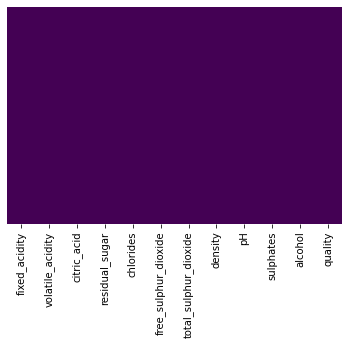

In [12]:
sns.heatmap(red_wine_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## __No Missing Values in any column__

In [13]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fixed_acidity          1599 non-null   float64
 1   volatile_acidity       1599 non-null   float64
 2   citric_acid            1599 non-null   float64
 3   residual_sugar         1599 non-null   float64
 4   chlorides              1599 non-null   float64
 5   free_sulphur_dioxide   1599 non-null   float64
 6   total_sulphur_dioxide  1599 non-null   float64
 7   density                1599 non-null   float64
 8   pH                     1599 non-null   float64
 9   sulphates              1599 non-null   float64
 10  alcohol                1599 non-null   float64
 11  quality                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Checking Duplicated Values

In [14]:
red_wine_data.duplicated().sum()

240

There are __240 duplicates__. The quality ratings for the same/similar wine were given by different wine tasters so there is a possibility of similar reviews. We can thus keep these duplicates.

# Checking Distribution of various features

array([[<AxesSubplot:title={'center':'fixed_acidity'}>,
        <AxesSubplot:title={'center':'volatile_acidity'}>,
        <AxesSubplot:title={'center':'citric_acid'}>],
       [<AxesSubplot:title={'center':'residual_sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free_sulphur_dioxide'}>],
       [<AxesSubplot:title={'center':'total_sulphur_dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

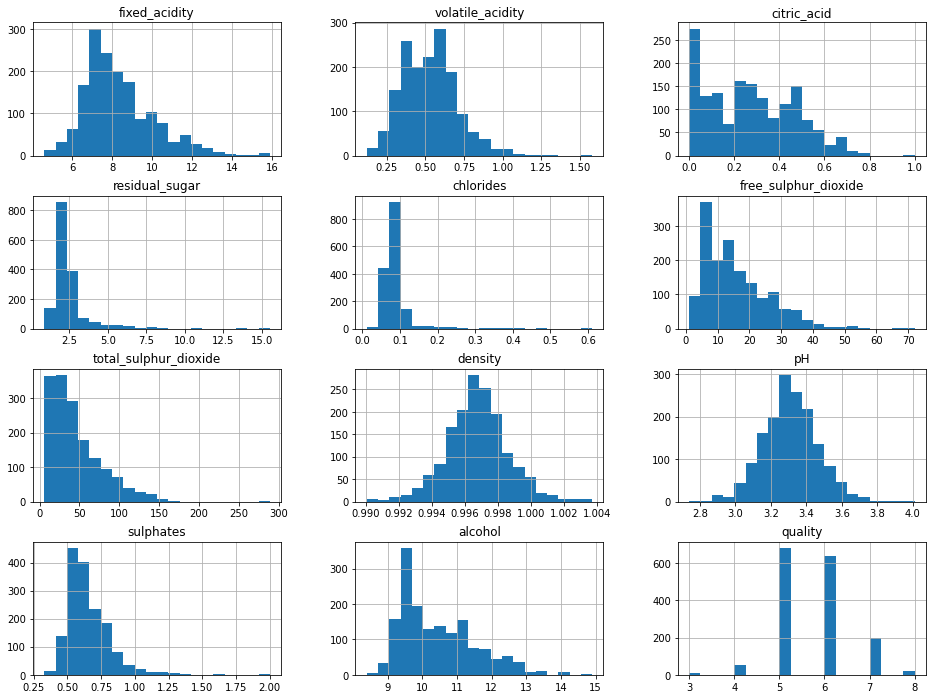

In [15]:
red_wine_data.hist(bins=20, figsize=(16,12))

#### - The distribution of the attribute __“alcohol”, "sulphates", "residual sugar", "chlorides"__ seems to be __positively skewed__ i.e the curve is shifted towards the left.
#### - The attributes __'density'__ and __'pH'__ are quite __normally distributed__.
#### - Now looking at the attribute __quality__, we can observe that the wines with average quality (i.e. quality rating 5 to 7) are more than wines with bad(1-4) or good(8-10) quality.

# Relation between features

In [16]:
red_wine_data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulphur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulphur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

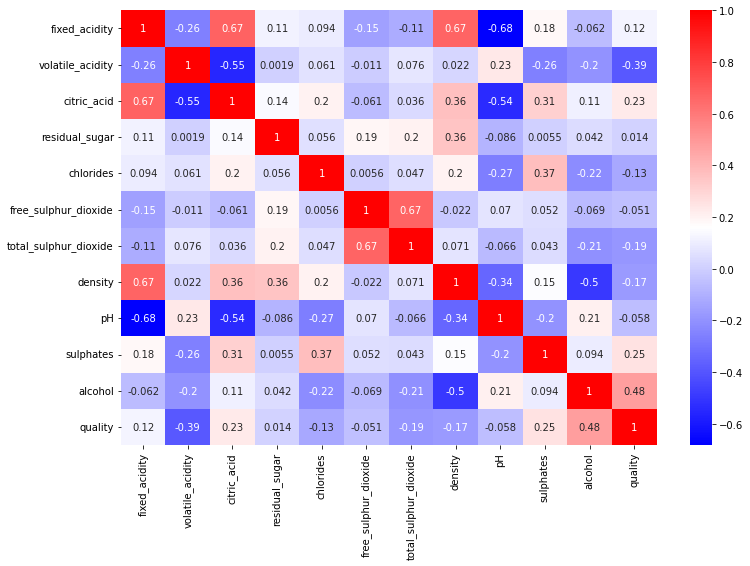

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(red_wine_data.corr(),cmap='bwr',annot=True)

- __Alcohol__ has the highest <font color=green>__positive__</font> correlation with __wine quality__, followed by the various other variables such as acidity, sulphates, density & chlorides.
- There is a relatively high <font color=green>__positive__</font> correlation between __fixed_acidity__ and __citric_acid__, __fixed_acidity__ and __density__.
- There is a relatively high <font color=red>__negative__</font> correlation between __fixed_acidity__ and __pH__.
- __Density__ has a strong <font color=green>__positive__</font> correlation with __fixed_acidity__, whereas it has a strong <font color=red> __negative__</font> correlation with __alcohol__.
- __citric acid__ & __volatile acidity__ have <font color=red>__negative__</font> correlation.
- __free sulphur dioxide__ & __total sulphur dioxide__ have <font color=green>__positive__</font> correlation.

In [18]:
columns = list(red_wine_data.columns.values)

In [19]:
col = []
for x in columns:
    str(x)
    col.append(x)

In [20]:
col.remove('quality')

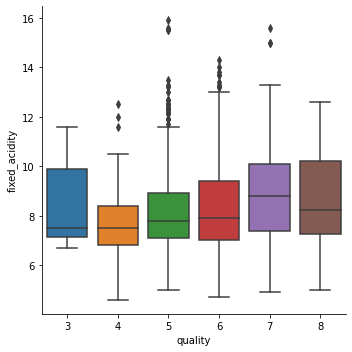

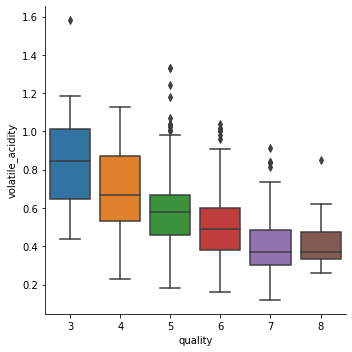

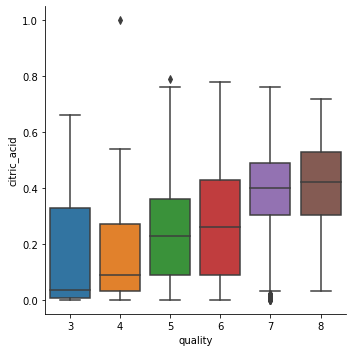

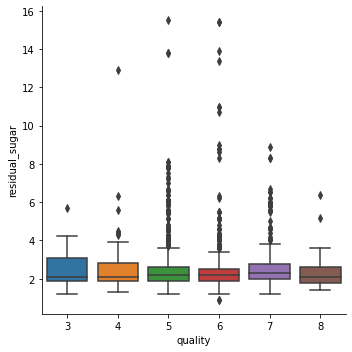

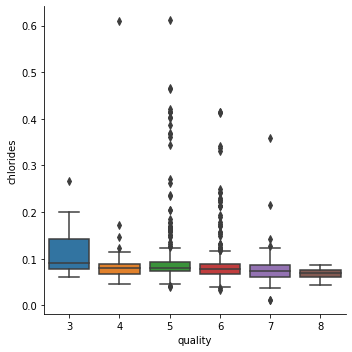

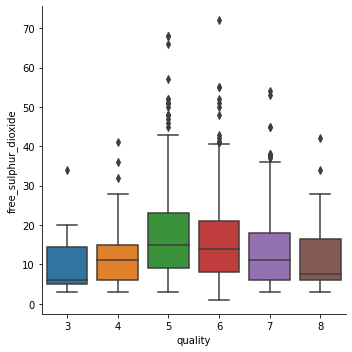

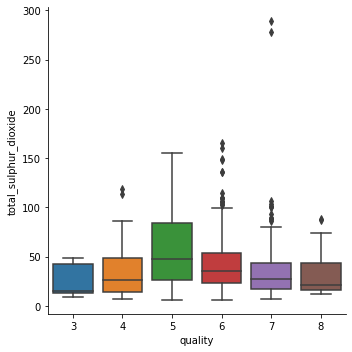

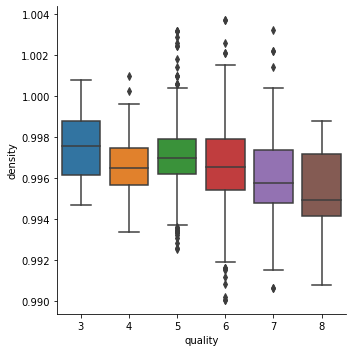

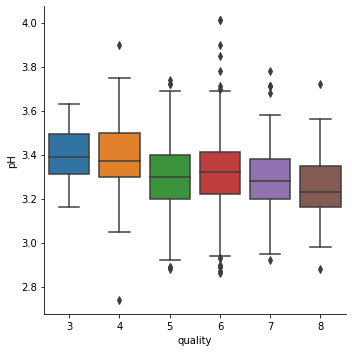

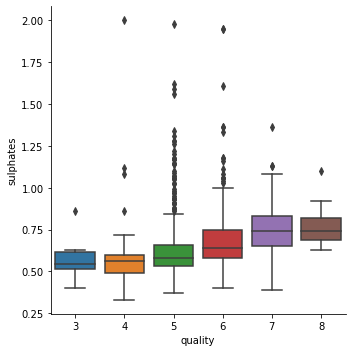

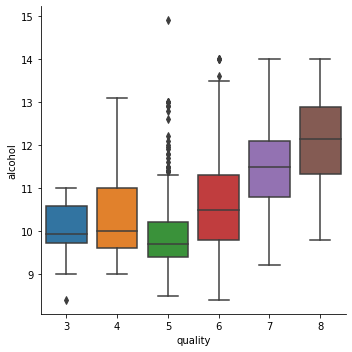

In [21]:
for x in col:
    sns.catplot(x="quality", y=x, data=red_wine_data, kind="box")

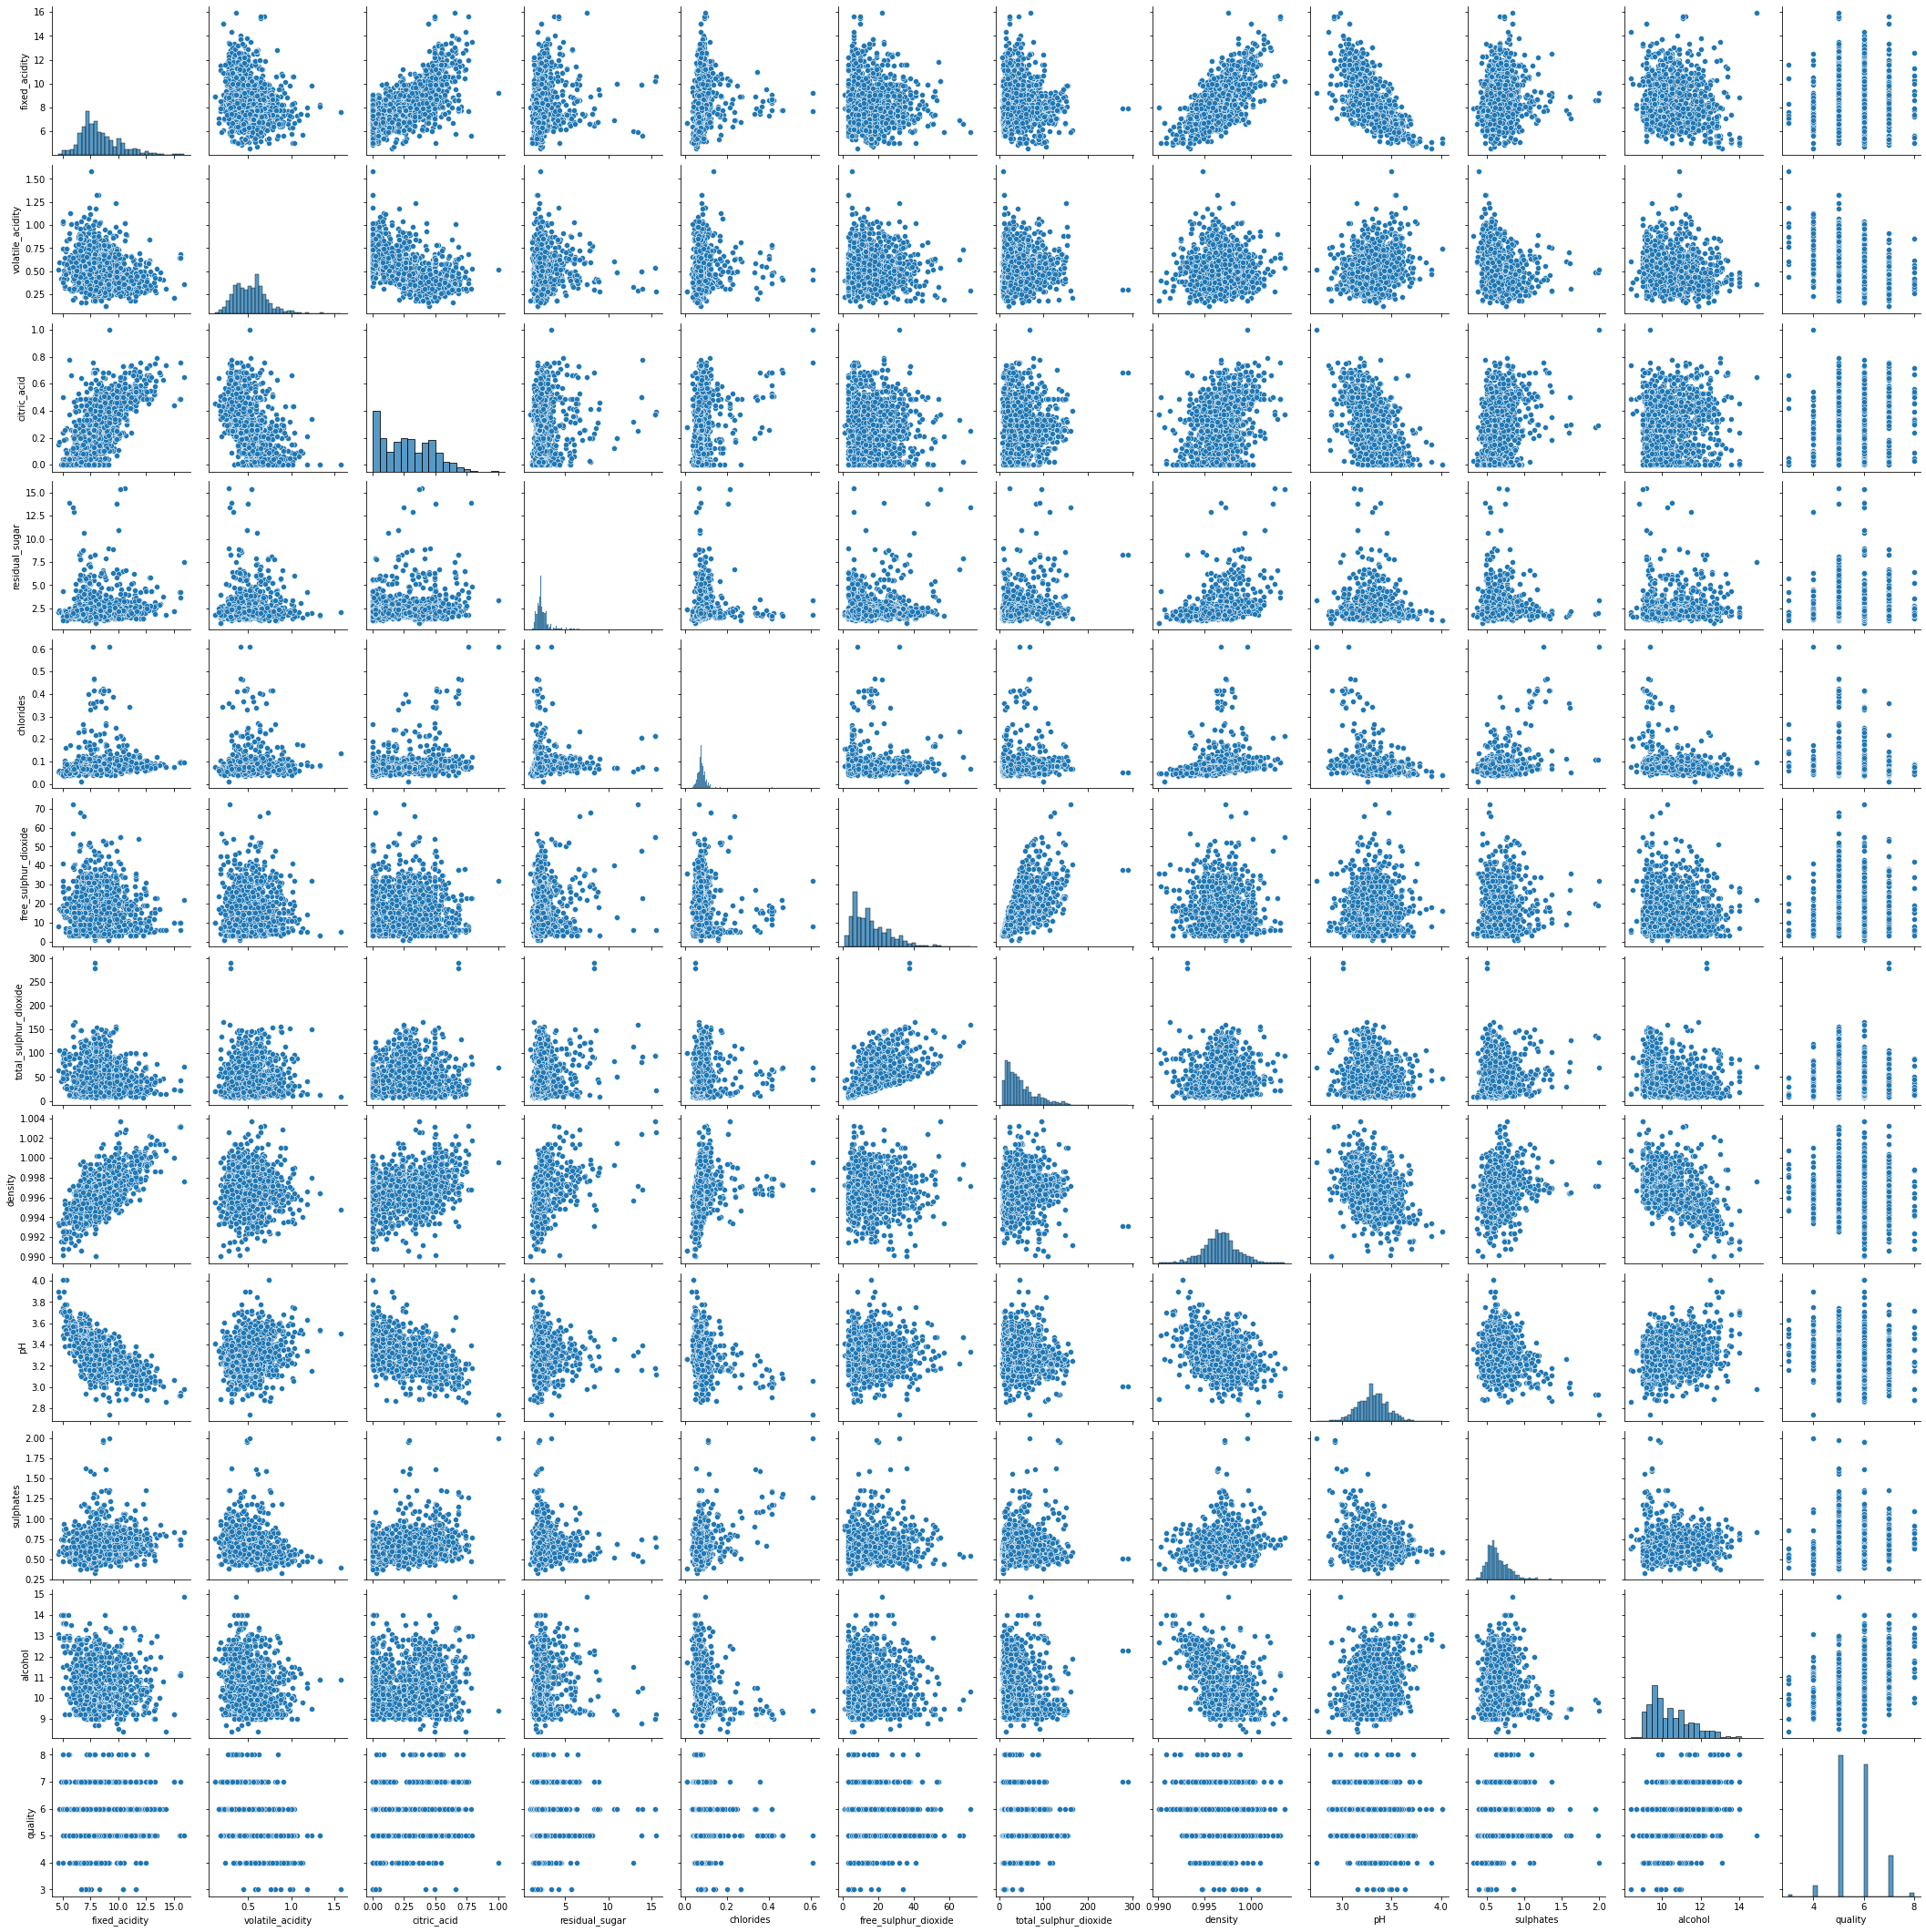

In [22]:
sns.pairplot(red_wine_data)

### We can derive following conclusions regarding relationship between target variable and different predictor variables:
### - Quality increases with increase in:  
####           1.  alcohol (High Impact)
####           2.  citric_acid and sulphates (Moderate Impact)
####           3.  fixed_acidity (low impact)
### - Quality decreases with increase in:
####           1.  volatile_acidity (Moderate Impact)
####           2.  chlorides, sulphur_dioxide, density (low impact)

# Checking Skweness in the Data

In [23]:
def check_skweness(columnName):
    print('''Before Correcting''')
    (mu, sigma) = norm.fit(red_wine_data[columnName])
    print("Mu before correcting {} : {}, Sigma before correcting {} : {}".format(
        columnName.upper(), mu, columnName.upper(), sigma))
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    sns.distplot(red_wine_data[columnName], fit=norm, color="orange")
    plt.title(columnName.upper() +
              " Distplot before Skewness Correction", color="black")
    plt.subplot(1,2,2)
    stats.probplot(red_wine_data[columnName], plot=plt)
    plt.show();

Before Correcting
Mu before correcting FIXED_ACIDITY : 8.31963727329581, Sigma before correcting FIXED_ACIDITY : 1.7405518001102729


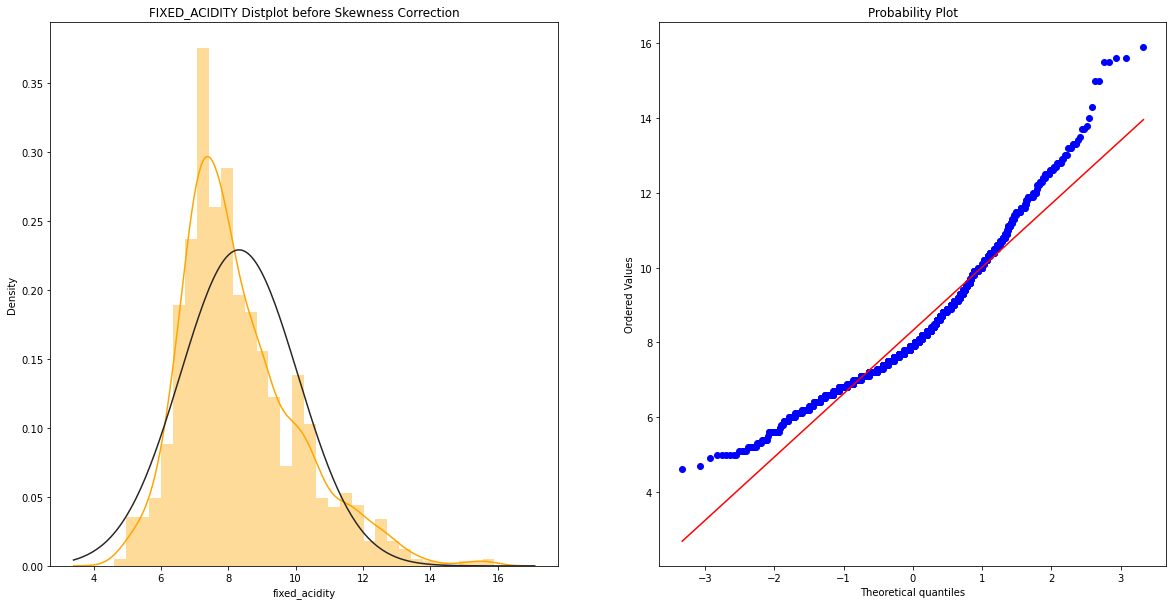

Before Correcting
Mu before correcting RESIDUAL_SUGAR : 2.53880550343965, Sigma before correcting RESIDUAL_SUGAR : 1.4094871124880495


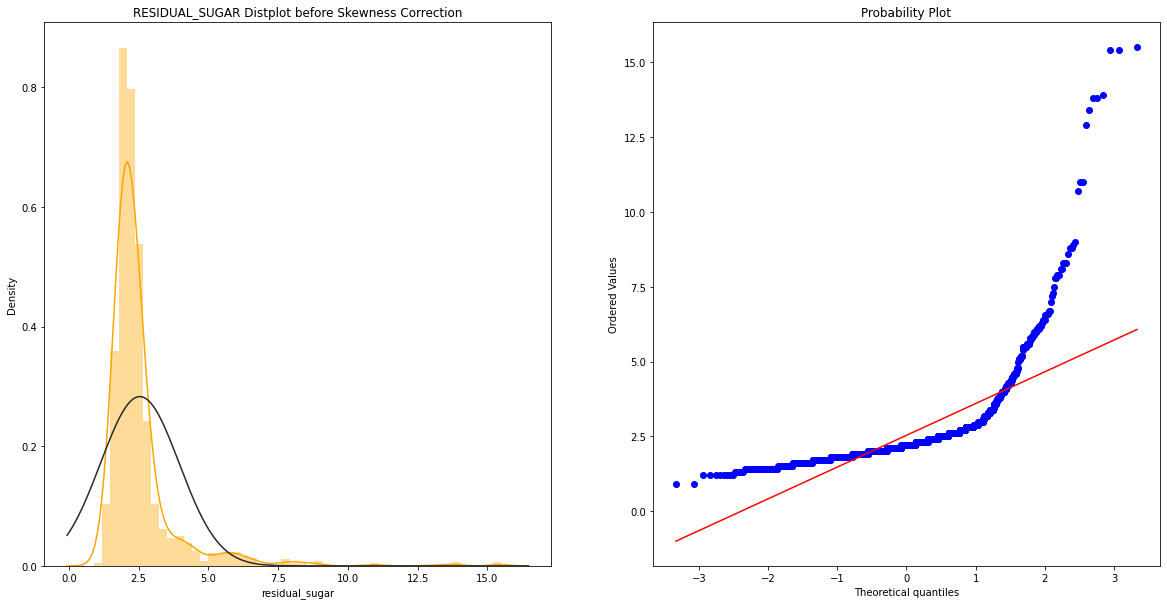

Before Correcting
Mu before correcting FREE_SULPHUR_DIOXIDE : 15.874921826141339, Sigma before correcting FREE_SULPHUR_DIOXIDE : 10.45688561493072


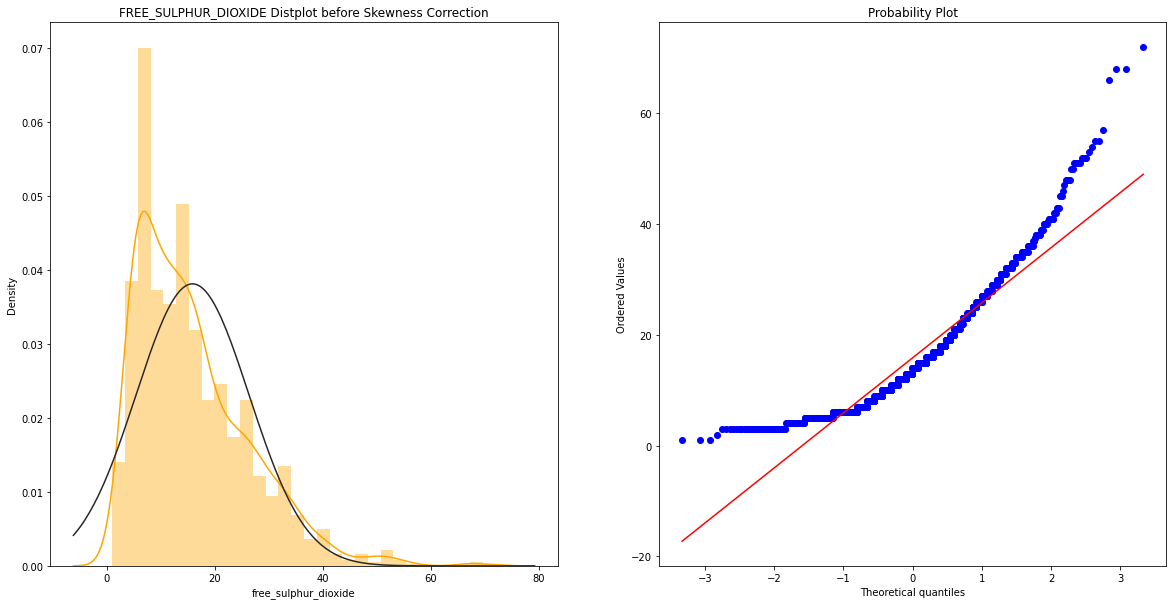

Before Correcting
Mu before correcting TOTAL_SULPHUR_DIOXIDE : 46.46779237023139, Sigma before correcting TOTAL_SULPHUR_DIOXIDE : 32.88503665178374


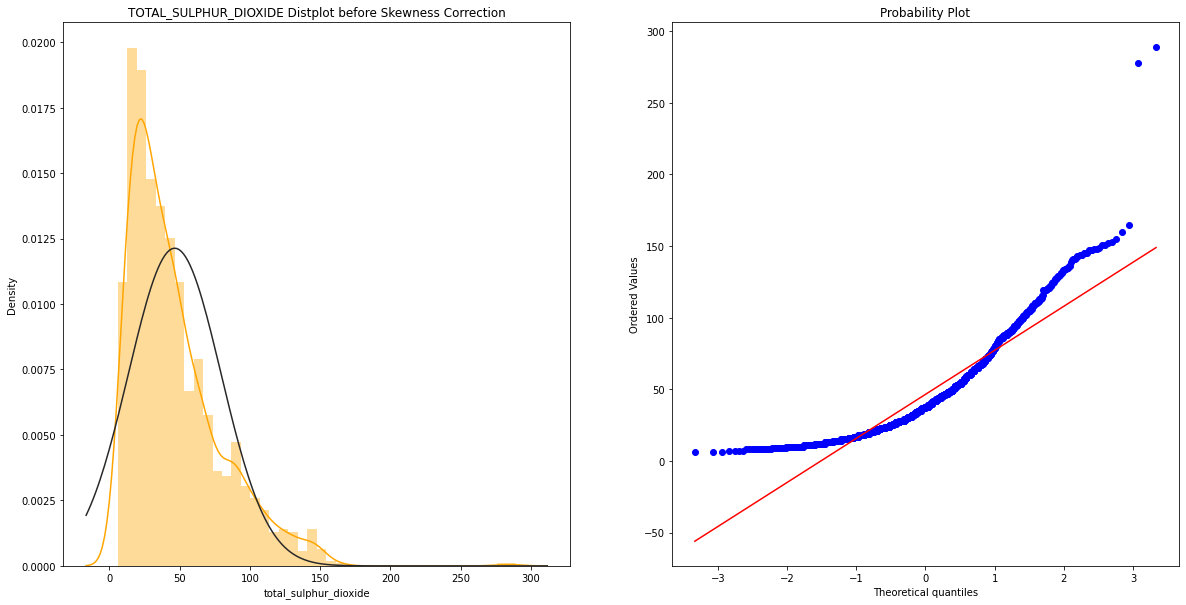

Before Correcting
Mu before correcting SULPHATES : 0.6581488430268917, Sigma before correcting SULPHATES : 0.16945396724179546


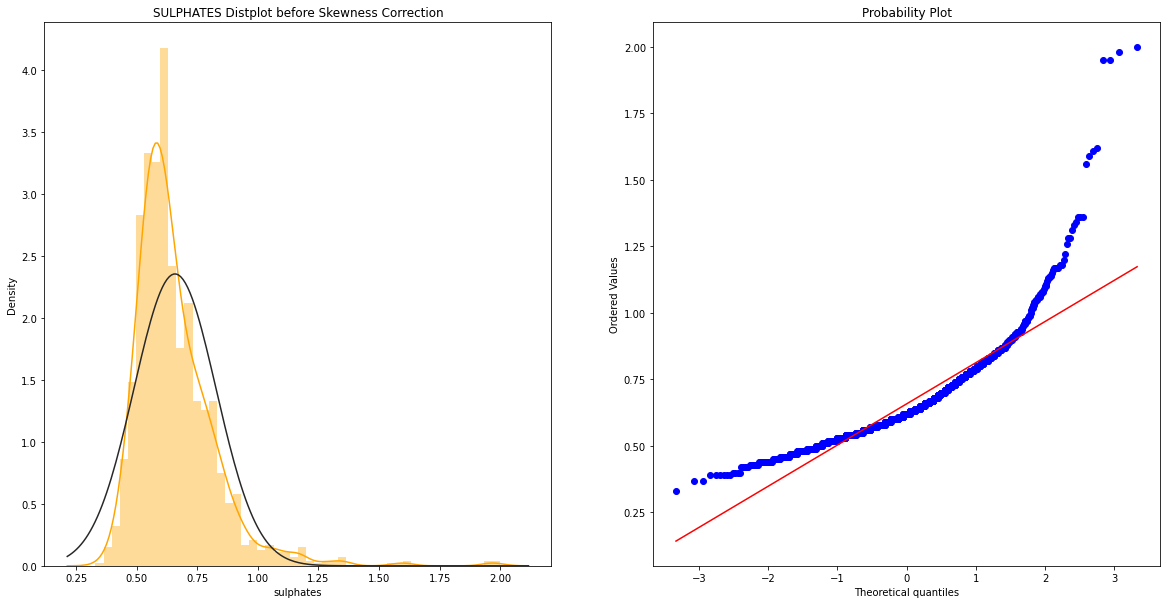

In [24]:
skewColumnList = [
    'fixed_acidity', 'residual_sugar', 'free_sulphur_dioxide', 'total_sulphur_dioxide', 'sulphates'
]
for columns in skewColumnList:
    check_skweness(columns)

# Correcting skewness using boxcox transformation

In [25]:
def skweness_correction(columnName):    
    red_wine_data[columnName], temp_params = boxcox(
        red_wine_data[columnName])
    print('''After Correcting''')
    (mu, sigma) = norm.fit(red_wine_data[columnName])
    print("Mu after correcting {} : {}, Sigma after correcting {} : {}".format(
        columnName.upper(), mu, columnName.upper(), sigma))
    plt.figure(figsize=(20, 10))
    plt.subplot(1,2,1)
    sns.distplot(red_wine_data[columnName], fit=norm, color="orange")
    plt.title(columnName.upper() +
              " Distplot After Skewness Correction", color="black")
    plt.subplot(1,2,2)
    stats.probplot(red_wine_data[columnName], plot = plt)
    plt.show();

After Correcting
Mu after correcting FIXED_ACIDITY : 1.124655731469057, Sigma after correcting FIXED_ACIDITY : 0.048378082803535


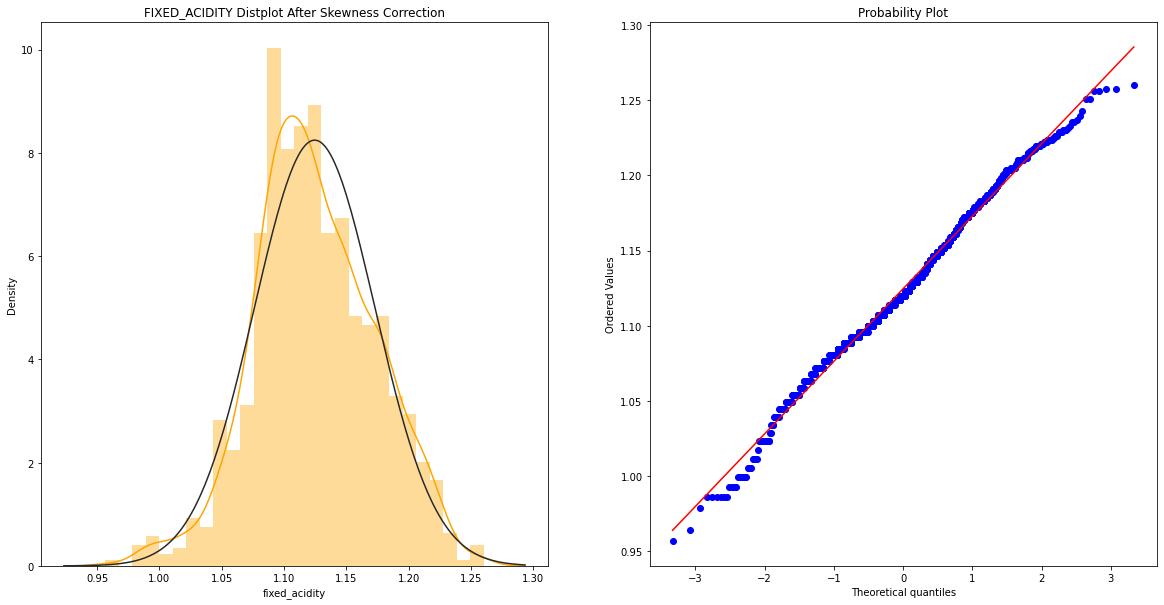

After Correcting
Mu after correcting RESIDUAL_SUGAR : 0.5135558435839319, Sigma after correcting RESIDUAL_SUGAR : 0.11004598444169933


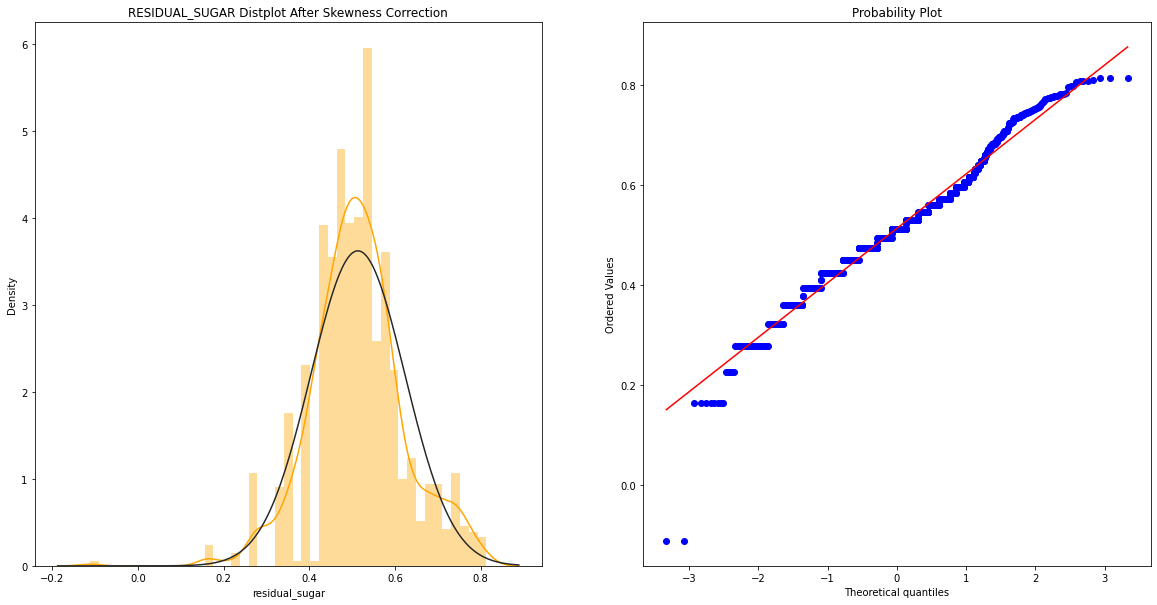

After Correcting
Mu after correcting FREE_SULPHUR_DIOXIDE : 3.1290485296425143, Sigma after correcting FREE_SULPHUR_DIOXIDE : 0.9855086968773705


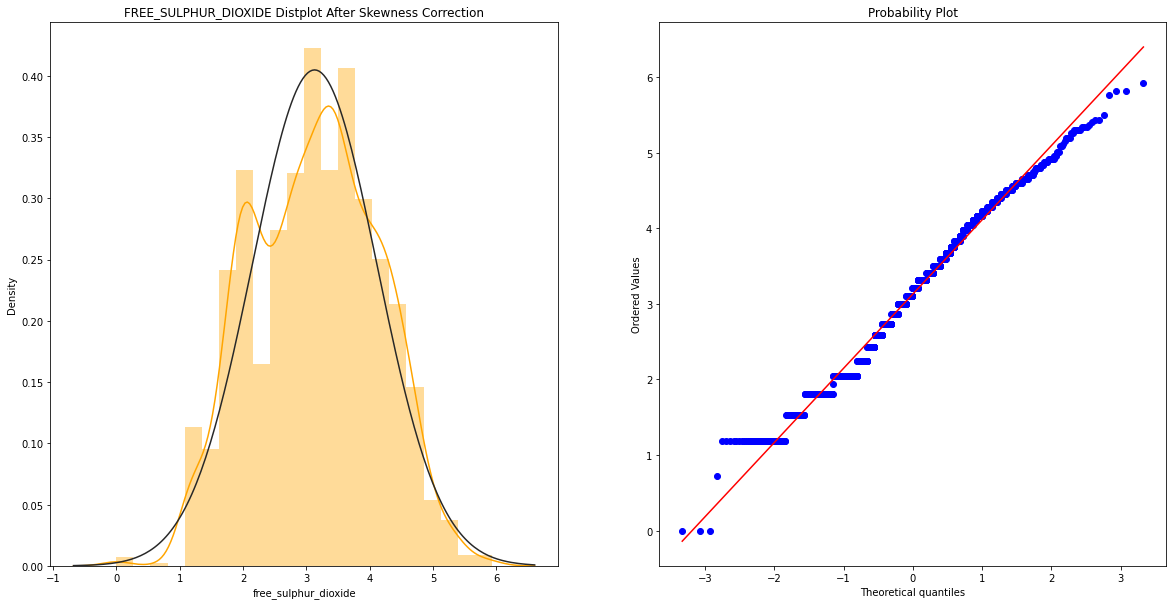

After Correcting
Mu after correcting TOTAL_SULPHUR_DIOXIDE : 3.9657192644535324, Sigma after correcting TOTAL_SULPHUR_DIOXIDE : 0.8459104716754929


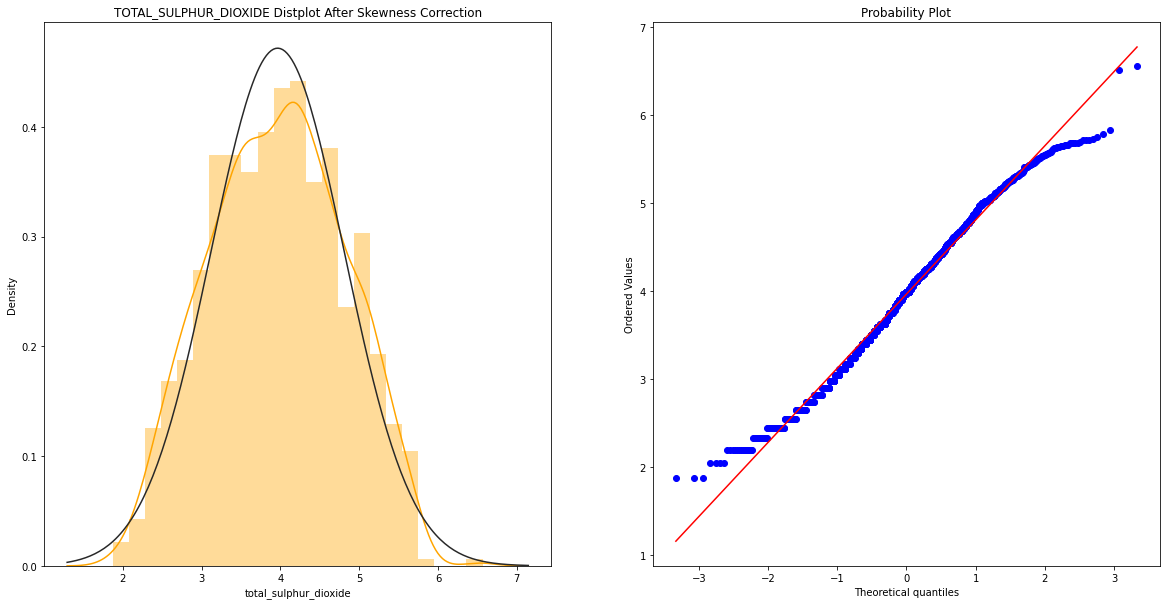

After Correcting
Mu after correcting SULPHATES : -0.6096631238347405, Sigma after correcting SULPHATES : 0.34058620296236386


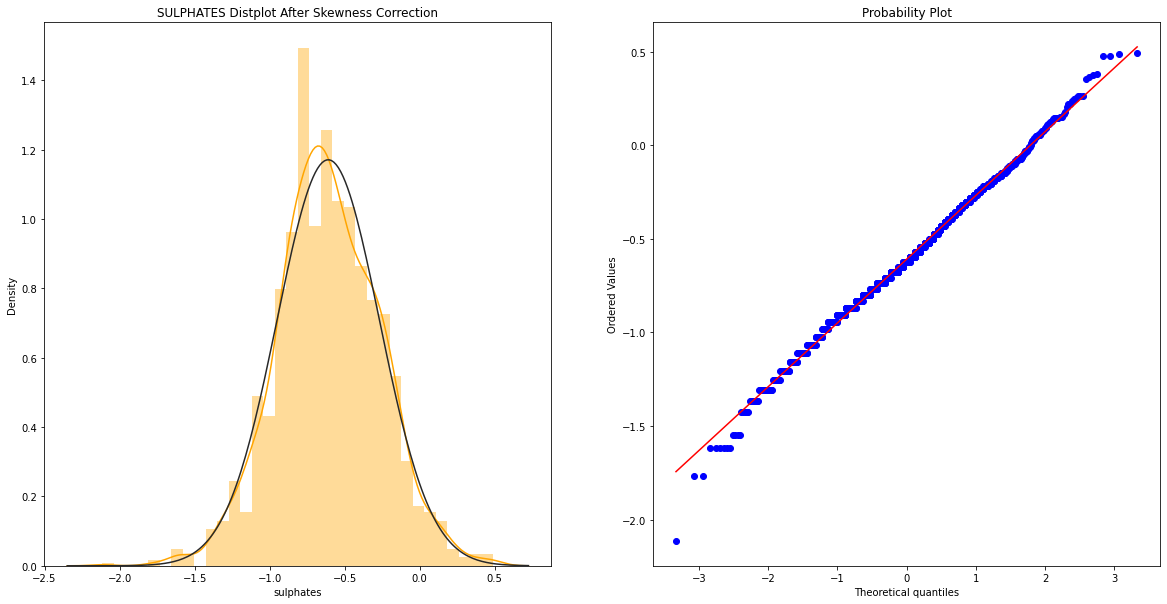

In [26]:
skewColumnList = [
    'fixed_acidity', 'residual_sugar', 'free_sulphur_dioxide', 'total_sulphur_dioxide', 'sulphates'
]
for columns in skewColumnList:
    skweness_correction(columns)

# Checking outliers

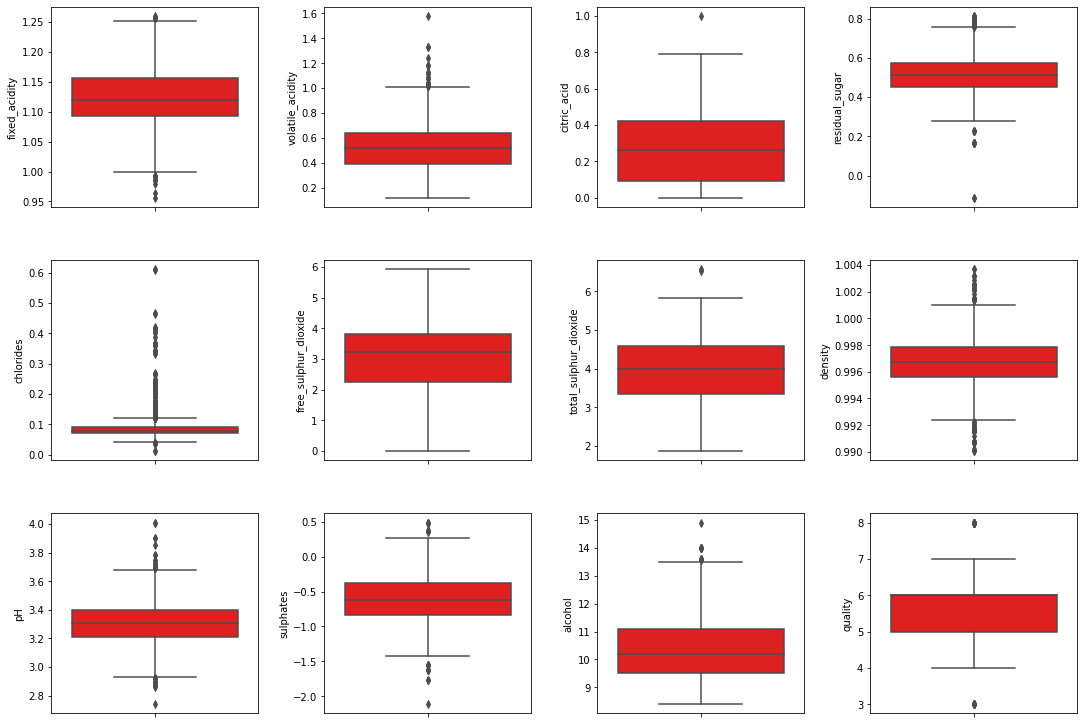

In [27]:
fig,ax=plt.subplots(3,4,figsize=(15,10))
index=0
ax=ax.flatten()
for col,value in red_wine_data.items():
    sns.boxplot(y=col, data=red_wine_data, color='r', ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=1, h_pad=5.0)

## There are outliers present in the dataset

# Handling Outliers

In [28]:
red_wine_data.shape

(1599, 12)

In [29]:
def detect_outliers(columns):
    outlier_indices = []

    for column in columns:
        # 1st quartile
        Q1 = np.percentile(red_wine_data[column], 25)
        # 3st quartile
        Q3 = np.percentile(red_wine_data[column], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = red_wine_data[(red_wine_data[column] < Q1 - outlier_step)
                              | (red_wine_data[column] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5)

    return multiple_outliers

In [30]:
print("number of outliers detected --> ",
      len(red_wine_data.loc[detect_outliers(red_wine_data.columns[:-1])]))

number of outliers detected -->  48


In [31]:
red_wine_data.loc[detect_outliers(red_wine_data.columns[:-1])]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality
45,0.956497,0.520,0.15,0.494302,0.054,2.427186,4.649352,0.99340,3.90,-0.801405,13.100000,4
94,0.985731,1.020,0.04,0.277689,0.045,4.920668,4.983161,0.99380,3.75,-1.111447,10.500000,4
95,0.964194,0.600,0.17,0.530233,0.058,3.504207,5.261323,0.99320,3.85,-0.678257,12.900000,6
442,1.257350,0.685,0.76,0.666360,0.100,2.046206,4.144017,1.00320,2.95,-0.476630,11.200000,7
553,0.985731,1.040,0.24,0.360736,0.050,4.503448,5.136097,0.99340,3.74,-0.622818,11.500000,5
554,1.256323,0.645,0.49,0.691490,0.095,2.733844,3.398654,1.00315,2.92,-0.354821,11.100000,5
555,1.256323,0.645,0.49,0.691490,0.095,2.733844,3.398654,1.00315,2.92,-0.354821,11.100000,5
557,1.257350,0.645,0.49,0.691490,0.095,2.733844,3.398654,1.00315,2.92,-0.354821,11.100000,5
588,0.985731,0.420,0.24,0.473382,0.060,3.673341,4.327250,0.99170,3.72,-0.354821,14.000000,8
652,1.260365,0.360,0.65,0.768664,0.096,3.900481,4.758716,0.99760,2.98,-0.191541,14.900000,5


In [32]:
red_wine_data = red_wine_data.drop(detect_outliers(red_wine_data.columns[:-1]),axis = 0).reset_index(drop = True)

In [33]:
red_wine_data.shape

(1551, 12)

## Outliers Removed!

# __Separating the target variables from predictor variables__

In [34]:
X = red_wine_data.iloc[:, 0:-1].values
y = red_wine_data.iloc[:, -1].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardizing Independent Variables

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Under this project, I have performed exploratory data analysis and feature engineering to convert raw data into model ready data